# LIBRARY

In [1]:
import pandas as pd
import numpy as np
 
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor


from IPython.display import display

import xgboost as xgb

# DATASET

In [2]:
!wget --no-check-certificate https://raw.githubusercontent.com/madityarafip/My-Machine-Learning/main/Dataset/AB_NYC_2019.csv

--2021-10-12 22:34:10--  https://raw.githubusercontent.com/madityarafip/My-Machine-Learning/main/Dataset/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: 'AB_NYC_2019.csv.2'

     0K .......... .......... .......... .......... ..........  0% 9.66K 11m50s
    50K .......... .......... .......... .......... ..........  1% 4.63K 18m8s
   100K .......... .......... .......... .......... ..........  2% 1.55K 36m13s
   150K .......... .......... .......... .......... ..........  2% 5.75K 31m50s
   200K .......... .......... .......... .......... ..........  3% 1.77K 37m49s
   250K .......... .......... .......... .......... ..........  4% 5.25K 34m46s
   300K .

In [3]:
columns = [
    'neighbourhood_group', 'room_type', 'latitude', 'longitude',
    'minimum_nights', 'number_of_reviews','reviews_per_month',
    'calculated_host_listings_count', 'availability_365',
    'price'
]

df = pd.read_csv('AB_NYC_2019.csv', usecols=columns)
df.reviews_per_month = df.reviews_per_month.fillna(0)


  6800K .......... .......... .......... .......... .......... 99% 29.3K 6s
  6850K .......... .......... .......... .......... .......... 99% 37.0K 1s
  6900K .......... ..                                         100% 20.7K=11m12s

2021-10-12 22:45:31 (10.3 KB/s) - 'AB_NYC_2019.csv.2' saved [7077973/7077973]



In [4]:
HW_df = df
HW_df.head(3)

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,0.00,1,365


In [5]:
HW_df.isna().sum()

neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Split Dataset Train/Val/Test (60%/20%/20%)

In [6]:
#80% Full Train, 20% Test
df_full_train, df_test = train_test_split(HW_df, test_size=0.2, random_state=1)
#60% Train, 20% Val (25% from Full Train -> 20%/80%)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

del df_train['price']
del df_val['price']
del df_test['price']

In [7]:
print('Train Full:', len(df_full_train), 
      '(', (len(df_full_train)/len(HW_df))*100, '%)') 
print('Train:', len(df_train), 
      '(', (len(df_train)/len(HW_df))*100, '%)') 
print('Validation:', len(df_val), 
      '(', (len(df_val)/len(HW_df))*100, '%)') 
print('Test:', len(df_test), 
      '(', (len(df_test)/len(HW_df))*100, '%)') 

Train Full: 39116 ( 80.0 %)
Train: 29337 ( 60.0 %)
Validation: 9779 ( 20.0 %)
Test: 9779 ( 20.0 %)


## OHE with DictVectorizer()

In [8]:
def OHE_DV(df, col):
    dicts = df[col].to_dict(orient='records')
    X_data = dv.fit_transform(dicts)
    
    return X_data

In [9]:
def OHE_DV_wo_fit(df, col):
    dicts = df[col].to_dict(orient='records')
    X_data = dv.transform(dicts)
    
    return X_data

In [10]:
categorical = ['neighbourhood_group', 'room_type']
numerical = ['latitude',
             'longitude',
             'minimum_nights',
             'number_of_reviews',
             'reviews_per_month',
             'calculated_host_listings_count',
             'availability_365']

In [11]:
dv = DictVectorizer(sparse=False)

X_col = categorical+numerical 

X_train = OHE_DV(df_train, X_col)
X_val = OHE_DV_wo_fit(df_val, X_col)

X_train.shape, X_val.shape

((29337, 15), (9779, 15))

## Train a Decision Tree Regressor

In [12]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

# ANS Q1:

In [13]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- room_type=Entire home/apt <= 0.50
|   |--- value: [4.29]
|--- room_type=Entire home/apt >  0.50
|   |--- value: [5.15]



## RMSE

In [14]:
def RMSE(y, y_pred):
    e = y_pred - y
    mse = (e ** 2).mean()
    rmse_val = np.sqrt(mse)

    return rmse_val

# ANS Q2:

In [15]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
RMSE_Q2 = RMSE(y_val, y_pred)
print(f'RMSE for Q2 is {round(RMSE_Q2, 3)}')

RMSE for Q2 is 0.462


# ANS Q3:

In [16]:
n_est = np.linspace(10,200,20).astype(int)
RMSE_Q3_score = []

for n in n_est:
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    RMSE_Q3 = RMSE(y_val, y_pred)
    
    RMSE_Q3_score.append((n, RMSE_Q3))

In [17]:
df_RMSE_Q3 = pd.DataFrame(RMSE_Q3_score, columns=['n_estimators', 'RMSE_Q3'])

## Plot RMSE for Q3

Text(0, 0.5, 'RMSE')

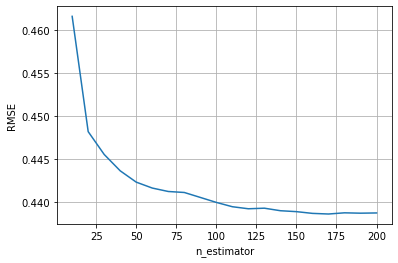

In [18]:
plt.plot(df_RMSE_Q3.n_estimators, df_RMSE_Q3.RMSE_Q3)
plt.grid()
plt.xlabel('n_estimator')
plt.ylabel('RMSE')

# ANS Q4:

In [19]:
n_est = np.linspace(10,200,20).astype(int)
RMSE_Q4_score = []

for md in [10, 15, 20, 25]:
    for n in n_est:
        rf = RandomForestRegressor(n_estimators=n, max_depth=md,
                                   random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict(X_val)
        RMSE_Q4 = RMSE(y_val, y_pred)
        
        RMSE_Q4_score.append((md, n, RMSE_Q4))

In [20]:
columns = ['max_depth', 'n_estimators', 'RMSE_Q4']
df_RMSE_Q4 = pd.DataFrame(RMSE_Q4_score, columns=columns)

## Plot RMSE for Q4

Text(0, 0.5, 'RMSE')

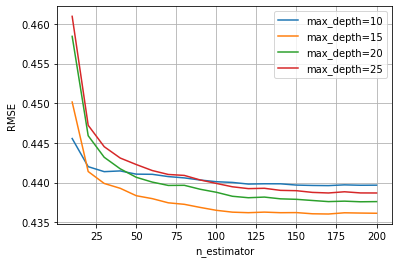

In [22]:
for md in [10, 15, 20, 25]:
    df_subset = df_RMSE_Q4[df_RMSE_Q4.max_depth == md]
    
    plt.plot(df_subset.n_estimators, df_subset.RMSE_Q4,
             label='max_depth=%d' % md)

plt.legend()
plt.grid()
plt.xlabel('n_estimator')
plt.ylabel('RMSE')

# ANS Q5:

In [23]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20,
                                   random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

## Plot Feature Importances for Q5

In [24]:
features = dv.get_feature_names()

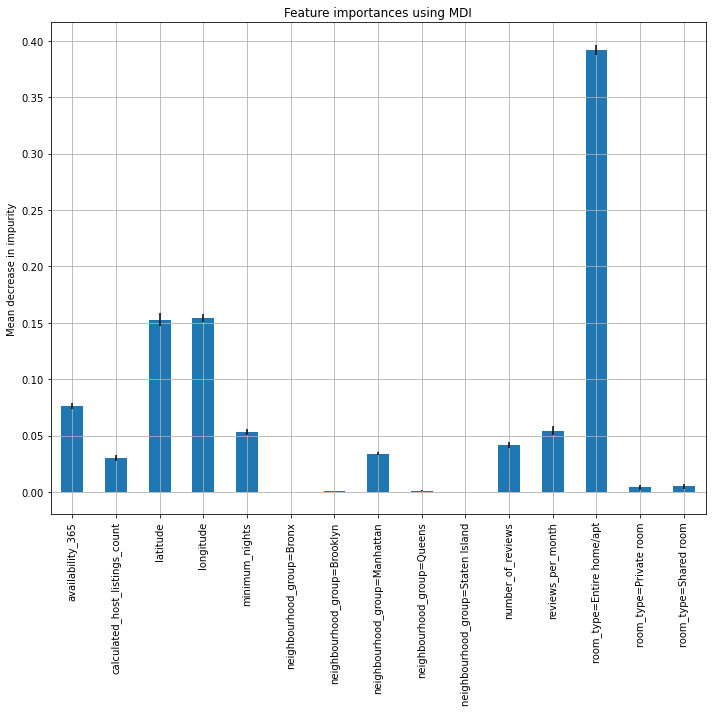

In [25]:
importances = rf.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in rf.estimators_], axis=0)

forest_importances = pd.Series(importances, index=features)

fig, ax = plt.subplots(figsize=(10,10))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.grid()
fig.tight_layout()

# ANS Q6:

In [26]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [27]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [28]:
RMSE_Q6_score = []
for eta_val in [0.3, 0.1, 0.01]:
    xgb_params = {
    'eta': eta_val, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1
    }
    
    model = xgb.train(xgb_params, dtrain, 
                      num_boost_round=100, evals=watchlist)
    
    y_pred = model.predict(dval)
    RMSE_Q6 = RMSE(y_val, y_pred)
    
    RMSE_Q6_score.append((eta_val, RMSE_Q6.round(3)))

[0]	train-rmse:3.02752	val-rmse:3.02415
[1]	train-rmse:2.14667	val-rmse:2.14390
[2]	train-rmse:1.53878	val-rmse:1.53721
[3]	train-rmse:1.12557	val-rmse:1.12523
[4]	train-rmse:0.85100	val-rmse:0.85174
[5]	train-rmse:0.67490	val-rmse:0.67752
[6]	train-rmse:0.56687	val-rmse:0.57148
[7]	train-rmse:0.50448	val-rmse:0.51139
[8]	train-rmse:0.46913	val-rmse:0.47777
[9]	train-rmse:0.45009	val-rmse:0.45965
[10]	train-rmse:0.43912	val-rmse:0.44981
[11]	train-rmse:0.43327	val-rmse:0.44475
[12]	train-rmse:0.42936	val-rmse:0.44210
[13]	train-rmse:0.42668	val-rmse:0.44038
[14]	train-rmse:0.42463	val-rmse:0.43943
[15]	train-rmse:0.42259	val-rmse:0.43827
[16]	train-rmse:0.42113	val-rmse:0.43772
[17]	train-rmse:0.42074	val-rmse:0.43787
[18]	train-rmse:0.41896	val-rmse:0.43744
[19]	train-rmse:0.41812	val-rmse:0.43726
[20]	train-rmse:0.41716	val-rmse:0.43691
[21]	train-rmse:0.41499	val-rmse:0.43645
[22]	train-rmse:0.41437	val-rmse:0.43611
[23]	train-rmse:0.41403	val-rmse:0.43614
[24]	train-rmse:0.41391	va

[0]	train-rmse:4.25336	val-rmse:4.25010
[1]	train-rmse:4.21141	val-rmse:4.20815
[2]	train-rmse:4.16988	val-rmse:4.16661
[3]	train-rmse:4.12877	val-rmse:4.12551
[4]	train-rmse:4.08807	val-rmse:4.08481
[5]	train-rmse:4.04779	val-rmse:4.04454
[6]	train-rmse:4.00792	val-rmse:4.00467
[7]	train-rmse:3.96845	val-rmse:3.96521
[8]	train-rmse:3.92937	val-rmse:3.92615
[9]	train-rmse:3.89070	val-rmse:3.88749
[10]	train-rmse:3.85242	val-rmse:3.84921
[11]	train-rmse:3.81452	val-rmse:3.81133
[12]	train-rmse:3.77701	val-rmse:3.77382
[13]	train-rmse:3.73988	val-rmse:3.73671
[14]	train-rmse:3.70313	val-rmse:3.69996
[15]	train-rmse:3.66674	val-rmse:3.66359
[16]	train-rmse:3.63073	val-rmse:3.62759
[17]	train-rmse:3.59508	val-rmse:3.59195
[18]	train-rmse:3.55979	val-rmse:3.55666
[19]	train-rmse:3.52487	val-rmse:3.52175
[20]	train-rmse:3.49030	val-rmse:3.48719
[21]	train-rmse:3.45608	val-rmse:3.45298
[22]	train-rmse:3.42220	val-rmse:3.41910
[23]	train-rmse:3.38867	val-rmse:3.38559
[24]	train-rmse:3.35548	va

In [29]:
columns = ['eta', 'RMSE_Q6']
df_RMSE_Q6 = pd.DataFrame(RMSE_Q6_score, columns=columns)
df_RMSE_Q6

,eta,RMSE_Q6
0,0.30,0.436
1,0.10,0.432
2,0.01,1.630
